# Air Quality Prediction Through Regression Model

### Domain Name: Environment Air quality

### Abstract: 

Contains the responses of a gas multisensor device deployed on the field in an Italian city.

To check the quality of air using ‘Air Quality Chemical Multisensor Device’ by finding the R^2 score and coefficient of regression using different regression models and the best model is selected to evaluate the Air Quality.

### Dataset: Air quality of an Italian city 

(https://archive.ics.uci.edu/ml/datasets/Air+quality)

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

**Attributes of the dataset are:**

|Sl No|	|Attribute|	|Description|
|-|	|-|	|-|
|0|	|Date|	|Date (DD/MM/YYYY) |
|1|	|Time|	|Time (HH.MM.SS) |
|2|	|CO(GT)|	|True hourly averaged concentration CO in mg/m^3 (reference analyzer) |
|3|	|PT08.S1(CO)|	|PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4|	|NMHC(GT)|	|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5|	|C6H6(GT)|	|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) |
|6|	|PT08.S2(NMHC)|	|PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
|7|	|NOx(GT)|	|True hourly averaged NOx concentration in ppb (reference analyzer) |
|8|	|PT08.S3(NOx)|	|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
|9|	|NO2(GT)|	|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) |
|10|	|PT08.S4(NO2)|	|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
|11|	|PT08.S5(O3)|	|PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
|12|	|T|	|Temperature in Â°C |
|13|	|RH|	|Relative Humidity (%) |
|14|	|AH|	|AH Absolute Humidity|


### Problem:

Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out. 

### Design:

Pre-processing: It is the first step to read the dataset and clean the data i.e. removing unwanted data or identifying null values. If any null values exist, we replace them with constant values or removing duplicates.

Exploration: Visualizing the dataset, detect outliers, replacing a missing value and cleaning the dataset, splitting training dataset into training and testing sets and checks for any correlation among the features using heatmap. Prediction: Here we predict the quality of air by finding R^2 score using different Regression models

Finally, I declare that the model with the highest R^2 score on both training and testing datasets will be concluded as the best model for evaluating the Quality of Air.

### Research Objective and Questions:

- **Find the Target Variable.**

- **Find the variable highly correlated with the target variable. Decide independent parameter to predict the dependent parameter for modelling.**

- **Find the best Model for Evaluating the Quality of Air with highest Accuracy Score**



### <u>Content:<u>

[1) Load data](#load_data)

[2) Basic statistics](#stat)

[3) Data Cleaning](#hr)
    
[4) Outlier Detection & Handling](#hr)

[5) Histograms](#hr)
    
[6) Co-relation between variables](#corr)

[7) Modelling](#LR)

[7a) 1. Linear Regression Model](#LRcon)

[7b) 2. Lasso Regression Model](#FE)

[7c) 3. Decision Tree Model](#FEcon)

[8) Conclusion ](#DT)


In [249]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
# Importing required libraries for further processes
import warnings
warnings.filterwarnings("ignore")

#### 1) Load data<a name="load_data"></a>

In [250]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv("Copy of AirQualityUCI.csv",header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [251]:
#See the end records of dataframe
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [252]:
df_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [253]:
# Check data types in this dateset
numeric_col= list(df_air.select_dtypes(np.number))
print(numeric_col)
print(len(numeric_col))
categorical_col= list(df_air.select_dtypes(include= 'object'))
print(len(categorical_col))

['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH']
13
2


In [254]:
# Handling duplicate values
df_air.duplicated().sum()

0

In [255]:
#drop end rows with NaN values
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

In [256]:
df_air.shape

(8991, 15)

#### 2) Basic statistics<a name="stat"></a>

In [257]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


#### 3) Data Cleaning<a name="hr"></a>

In [258]:
#Split hour from time into new column
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

##### How many missing values now?

In [259]:
print('Count of missing values:\n',df_air.isnull().sum())

Count of missing values:
 DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


##### Fill missing value strategy

-CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

-NHHC_GT will be dropped as it has 90% missing data

In [260]:
df_air['DATE']=pd.to_datetime(df_air.DATE, format='%m/%d/%Y')   #Format date column

In [261]:
# set the index as date
df_air.set_index('DATE',inplace=True)

In [262]:
df_air['MONTH']=df_air.index.month     #Create month column (Run once)
df_air.reset_index(inplace=True)
#df_air.head()

##### Drop column NMHC_GT; it has 90% missing data

In [263]:
df_air.drop('NMHC_GT',axis=1,inplace=True)    #drop col

##### Fill NaN values with monthly average of particular hour

In [264]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [265]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


##### Fill left out NaaN values with hourly average value

In [266]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

In [267]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64


In [268]:
sns.set_theme(style="whitegrid")

### Outliers Detection and Imputation

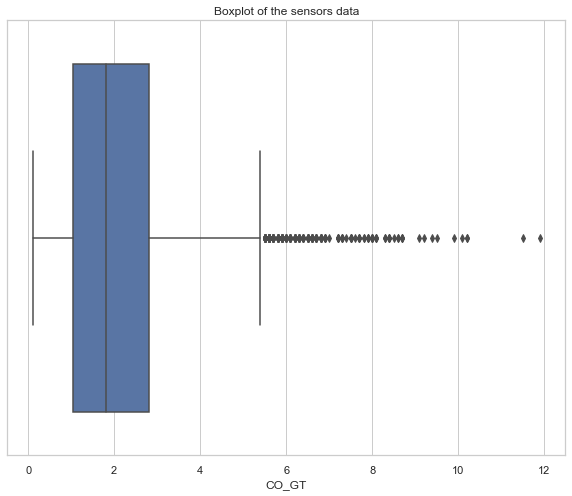

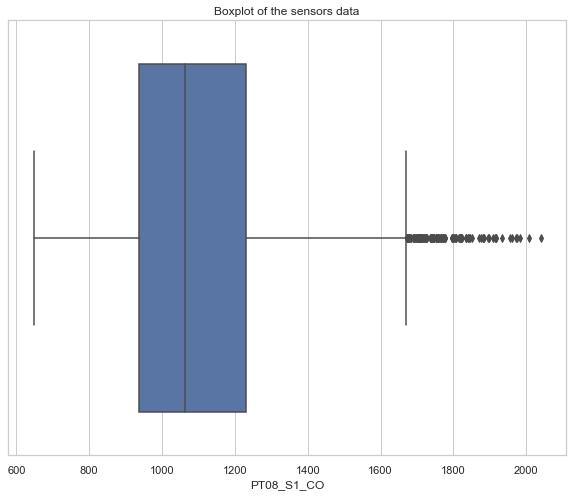

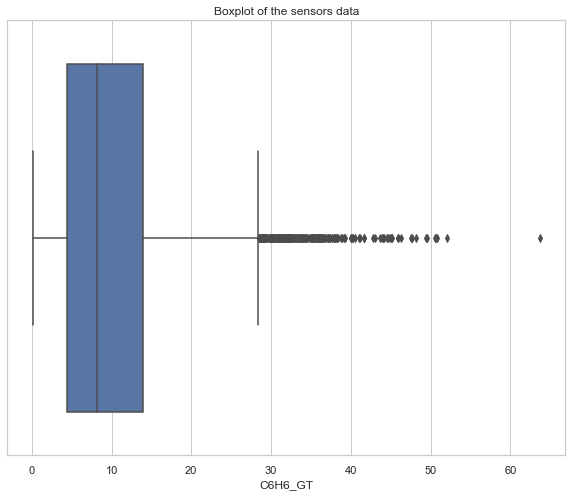

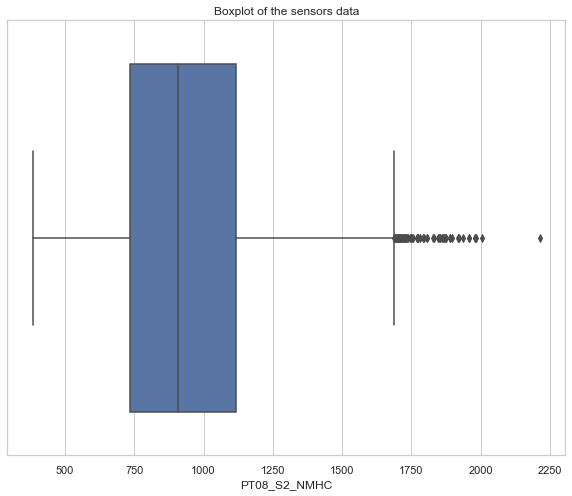

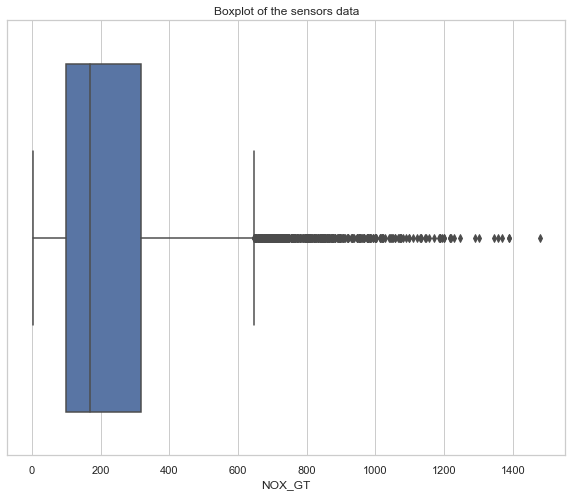

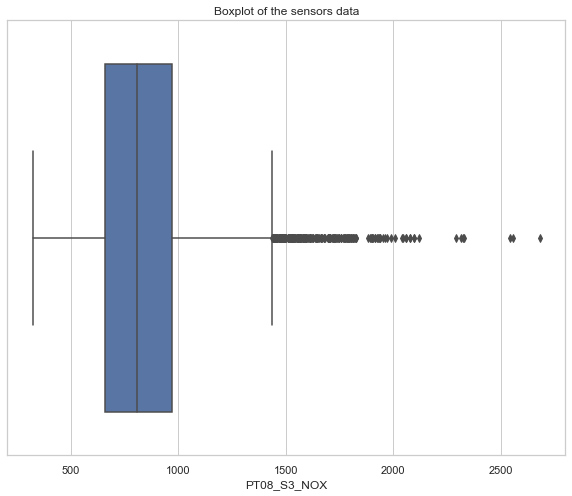

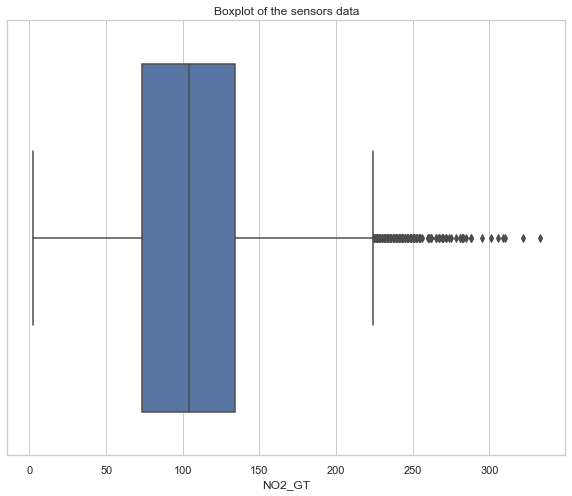

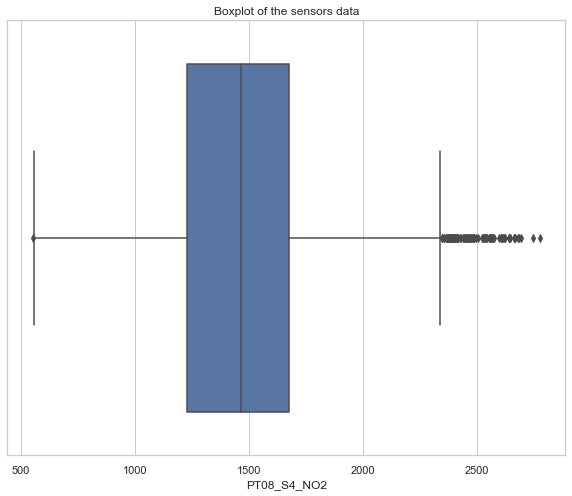

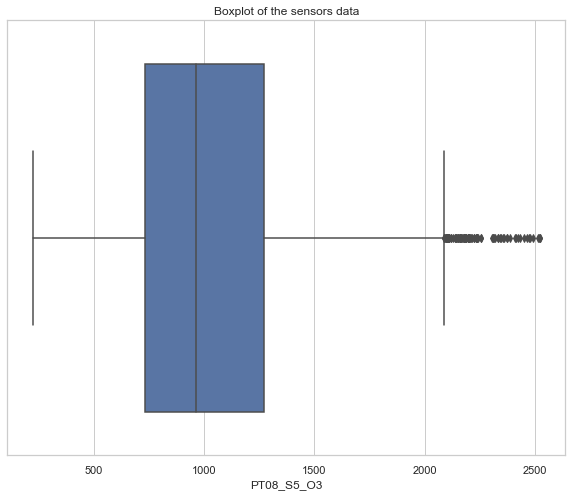

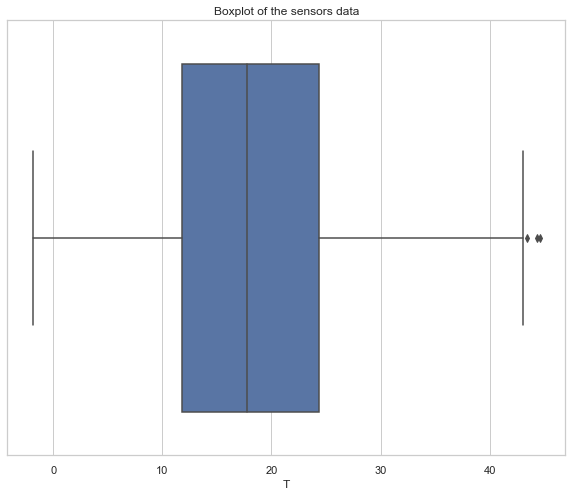

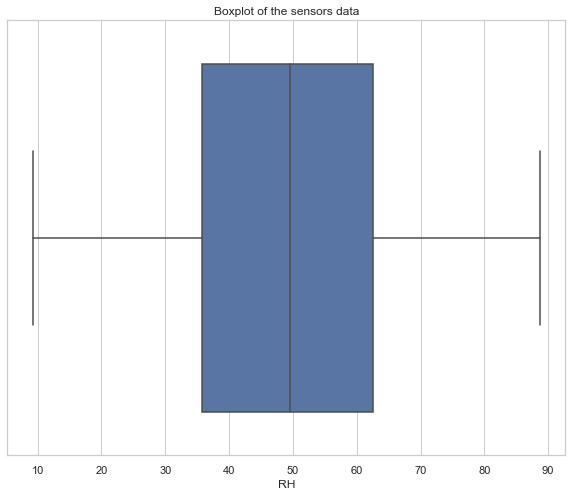

In [269]:
# visualizing the outliers
#Plotting Boxplots to show Outliers
for i in df_air.columns[2:13]:
    sns.boxplot(x=df_air[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [270]:
#Removing Outliers with the Interquartile Range Method (IQR)

Q1 = df_air.quantile(0.25) #first 25% of the data
Q3 = df_air.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (df_air[df_air.columns[2:13]] < lower_lim)
upper_outliers = (df_air[df_air.columns[2:13]] > upper_lim)

In [271]:
#Checking the resulting outliers calculated by the above method (represented below as non-null values)

df_air[df_air.columns[2:13]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO_GT         105 non-null    float64
 1   PT08_S1_CO    30 non-null     float64
 2   C6H6_GT       105 non-null    float64
 3   PT08_S2_NMHC  13 non-null     float64
 4   NOX_GT        235 non-null    float64
 5   PT08_S3_NOX   114 non-null    float64
 6   NO2_GT        39 non-null     float64
 7   PT08_S4_NO2   20 non-null     float64
 8   PT08_S5_O3    17 non-null     float64
 9   T             0 non-null      float64
 10  RH            0 non-null      float64
dtypes: float64(11)
memory usage: 772.8 KB


In [272]:
#Create new DataFrame without the outliers

num_cols = list(df_air.columns[2:13])
df_out_IQR = df_air[~((df_air[num_cols] < (Q1 - 2 * IQR)) |(df_air[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
df_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8537 entries, 0 to 8990
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          8537 non-null   datetime64[ns]
 1   TIME          8537 non-null   object        
 2   CO_GT         8537 non-null   float64       
 3   PT08_S1_CO    8537 non-null   float64       
 4   C6H6_GT       8537 non-null   float64       
 5   PT08_S2_NMHC  8537 non-null   float64       
 6   NOX_GT        8537 non-null   float64       
 7   PT08_S3_NOX   8537 non-null   float64       
 8   NO2_GT        8537 non-null   float64       
 9   PT08_S4_NO2   8537 non-null   float64       
 10  PT08_S5_O3    8537 non-null   float64       
 11  T             8537 non-null   float64       
 12  RH            8537 non-null   float64       
 13  AH            8537 non-null   float64       
 14  HOUR          8537 non-null   int64         
 15  MONTH         8537 non-null   int64   

In [273]:
#Eliminating rows with NaN values 

df_air = df_out_IQR.dropna(how='any', axis=0)
df_air.reset_index(drop=True,inplace=True)

In [274]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8537 entries, 0 to 8536
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          8537 non-null   datetime64[ns]
 1   TIME          8537 non-null   object        
 2   CO_GT         8537 non-null   float64       
 3   PT08_S1_CO    8537 non-null   float64       
 4   C6H6_GT       8537 non-null   float64       
 5   PT08_S2_NMHC  8537 non-null   float64       
 6   NOX_GT        8537 non-null   float64       
 7   PT08_S3_NOX   8537 non-null   float64       
 8   NO2_GT        8537 non-null   float64       
 9   PT08_S4_NO2   8537 non-null   float64       
 10  PT08_S5_O3    8537 non-null   float64       
 11  T             8537 non-null   float64       
 12  RH            8537 non-null   float64       
 13  AH            8537 non-null   float64       
 14  HOUR          8537 non-null   int64         
 15  MONTH         8537 non-null   int64   

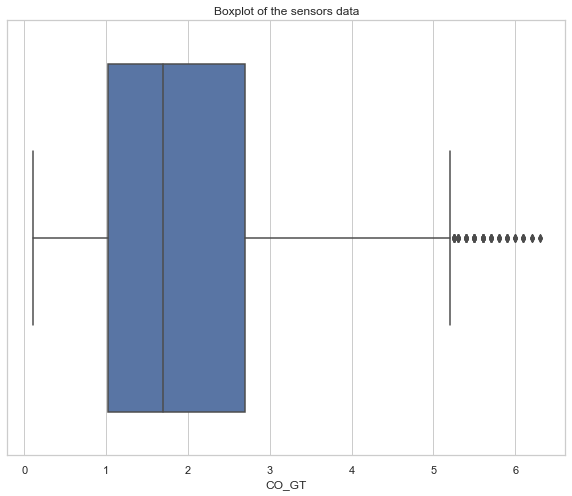

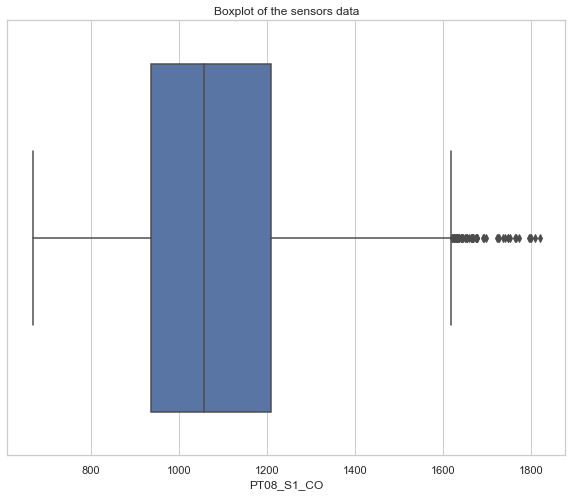

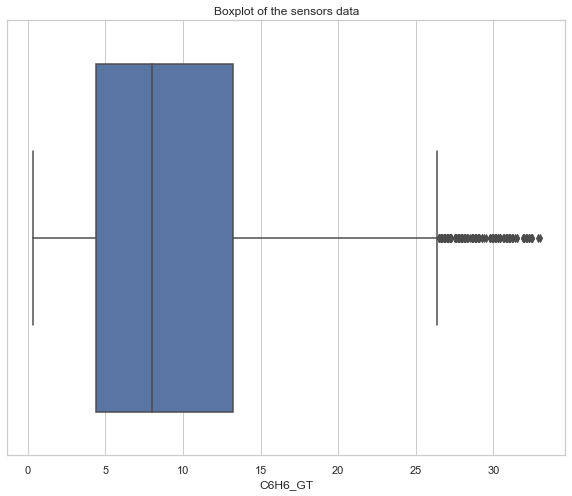

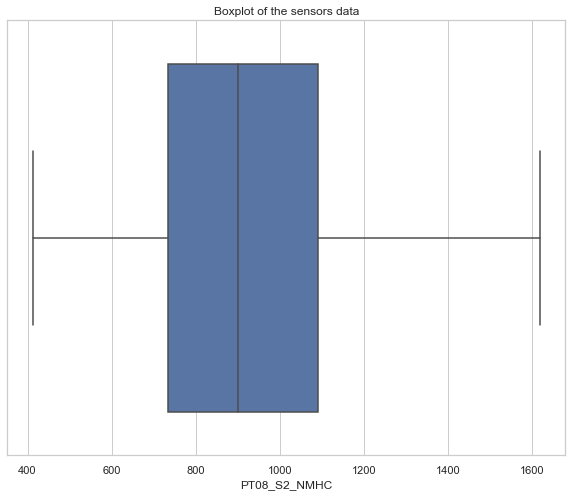

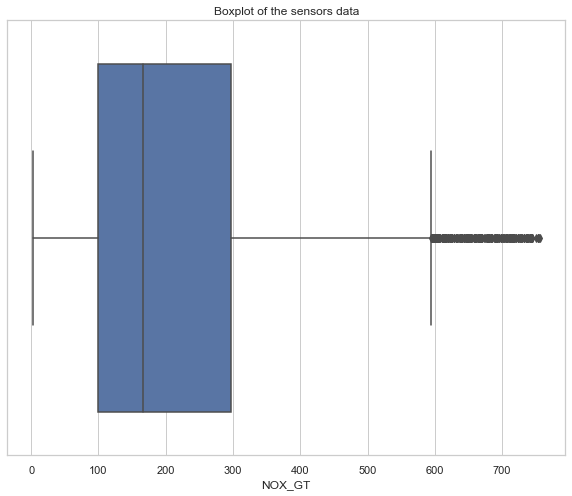

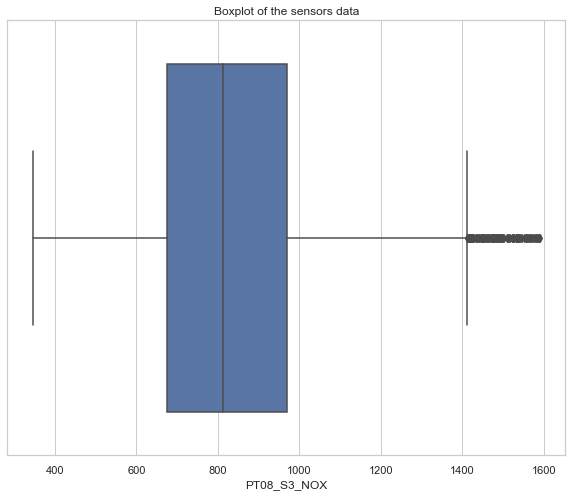

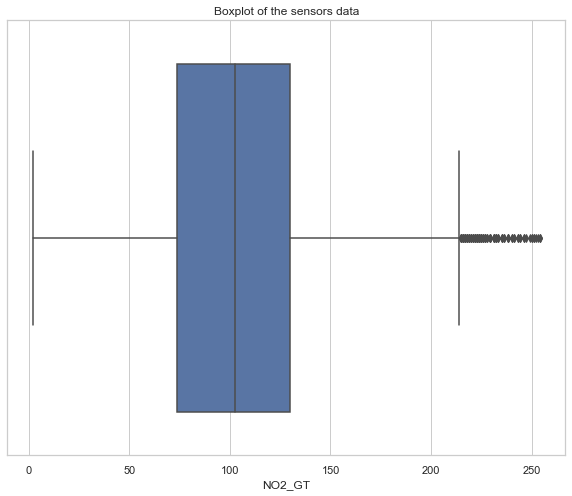

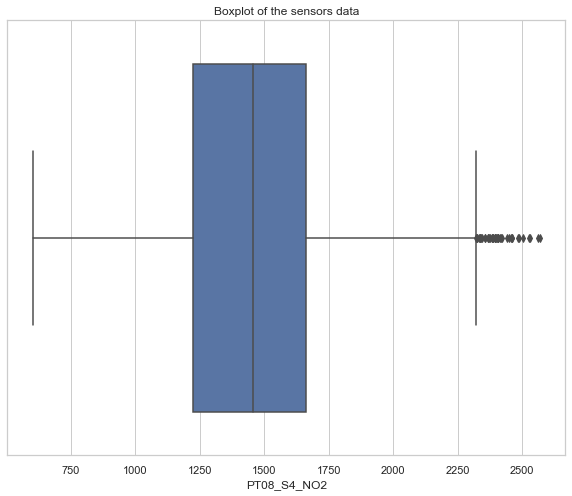

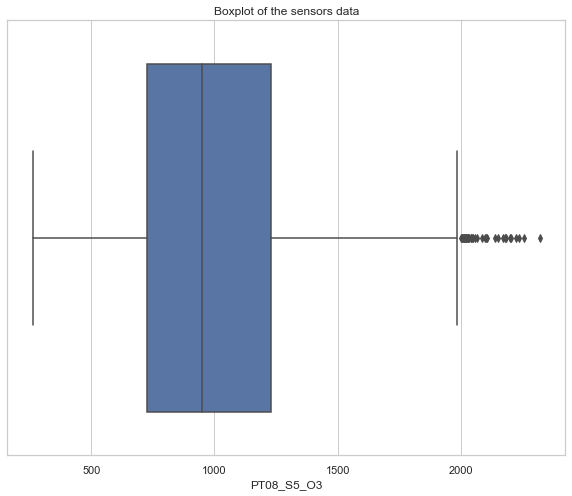

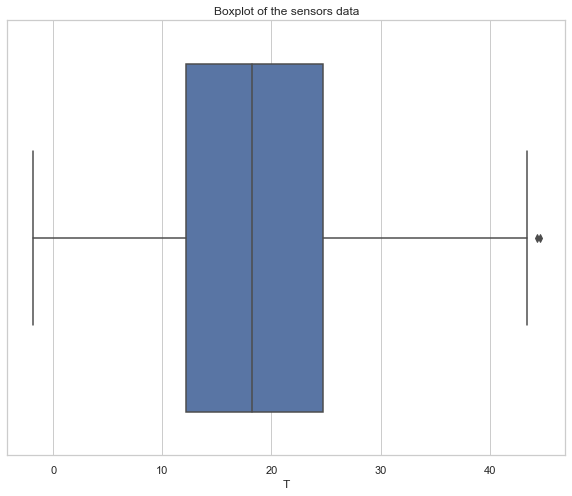

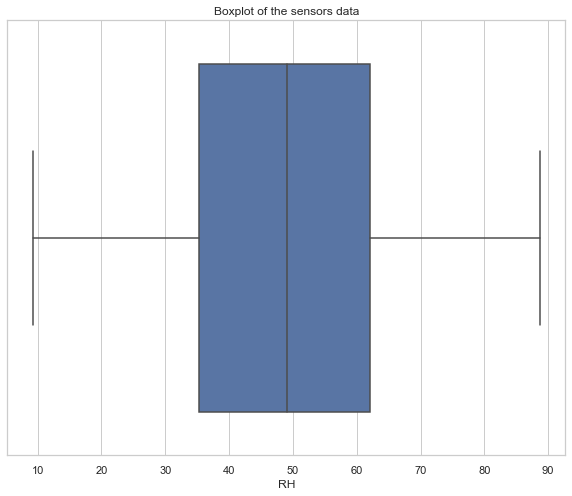

In [275]:
# visualizing the outliers
#Re-plotting Boxplot after Removing Outliers and Missing Values

for i in df_air.columns[2:13]:
    sns.boxplot(x=df_air[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

> We have used Interquartile Range Method (IQR) to treat/ remove Outliers from the above variables. 

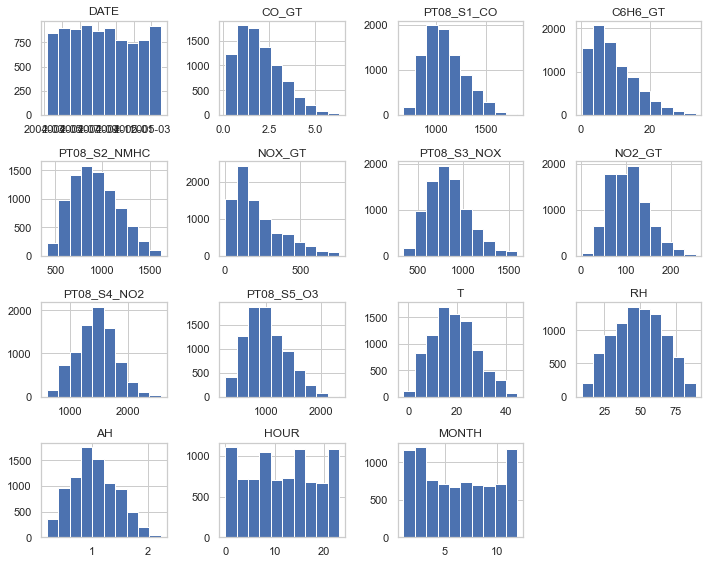

In [276]:
# Now see the histogram plot of every attribute
df_air.hist()
plt.tight_layout()
plt.show();

#### 4) Understand co-relation between variables<a name="corr"></a>

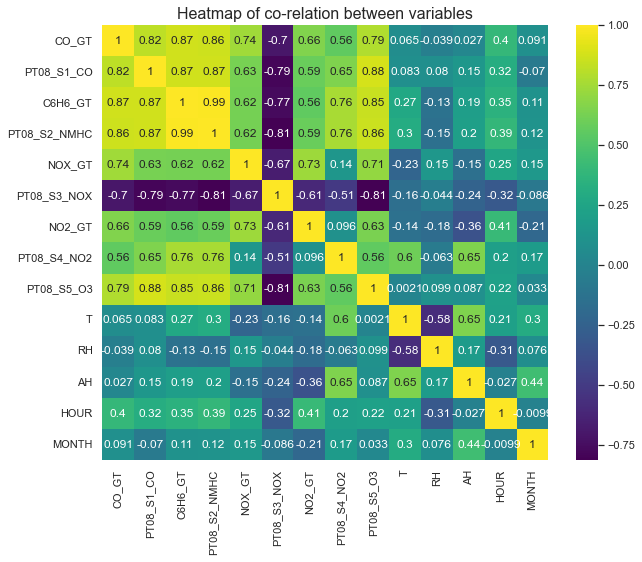

In [277]:
# now see the correlation among all the attributes

sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

> By seeing these correlation we conclude that Target variable : C6H6_GT is highly correlated to PTO8.S2_NMHC, so we take PTO8.S2_NMHC as independent parameter to predict the dependent parameter i.e, C6H6_GT

## Classification & Modeling

> With the help of the Correlation Matrix we took PTO8.S2_NMHC as independent parameter as X And C6H6_GT as taking dependent parameter as Y. 
> We splitted the train (X_train, Y_train) and test (X_test, Y_test) data.
> Giving 10 samples for training and 90 samples for testing this is very quiet interesting to do because we only have 10 sample out of 100 for training and 90 samples for testing.


In [193]:
X = df_air[['PT08_S2_NMHC']] # taking independent parameter as X
y = df_air['C6H6_GT'] # taking dependent parameter as y

### 1. Linear Regression Model

> Here we splitted the train and test data, we giving 10 samples for training and 90 samples for testing this is very quite interesting to do because we only have 10 sample out of 100 for training and 90 samples for testing, Let see how the model going to predict

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9)

In [195]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predict = lm.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


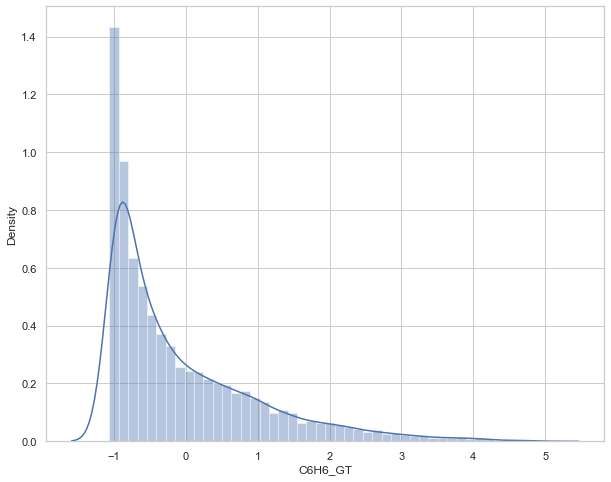

In [196]:
sns.distplot(y_test-lm_predict);

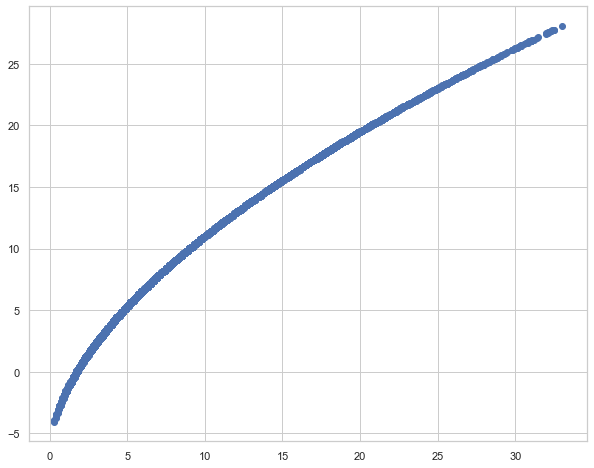

In [197]:
plt.scatter(y_test,lm_predict);

In [198]:
from sklearn import metrics
lmstat = [round(metrics.mean_squared_error(y_test,lm_predict),4), round(np.sqrt(metrics.mean_squared_error(y_test,lm_predict)),4),round(metrics.r2_score(y_test,lm_predict)*100,4)]
print('MSE value for LinearRegression model is {}'.format(lmstat[0]))
print('RMSE value for LinearRegression model is {}'.format(lmstat[1]))
print('R^2 value for LinearRegression model is {}'.format(lmstat[2]))

MSE value for LinearRegression model is 1.1097
RMSE value for LinearRegression model is 1.0534
R^2 value for LinearRegression model is 97.2476


### 2. Lasso Regression Model

In [199]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-1.1637691261174656


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.793e+03, tolerance: 2.757e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.950e+03, tolerance: 2.844e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.660e+03, tolerance: 

In [200]:
lasso_predict = lasso_regressor.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


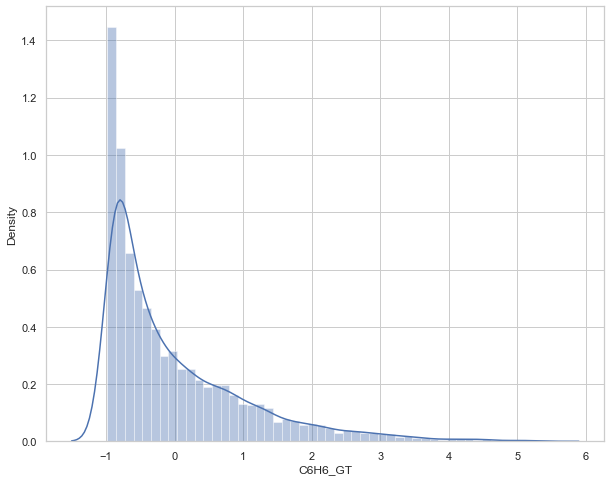

In [201]:
sns.distplot(y_test-lasso_predict);

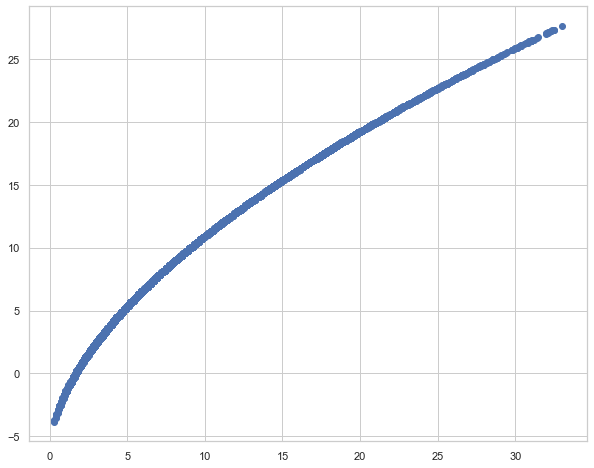

In [202]:
plt.scatter(y_test,lasso_predict);

In [203]:
lassostat = [round(metrics.mean_squared_error(y_test,lasso_predict),4), round(np.sqrt(metrics.mean_squared_error(y_test,lasso_predict)),4),round(metrics.r2_score(y_test,lasso_predict)*100,4)]
print('MSE value for LassoRegression model is {}'.format(lassostat[0]))
print('RMSE value for LassoRegression model is {}'.format(lassostat[1]))
print('R^2 value for LassoRegression model is {}'.format(lassostat[2]))

MSE value for LassoRegression model is 1.0903
RMSE value for LassoRegression model is 1.0442
R^2 value for LassoRegression model is 97.2955


### 3. Decision Tree Model

In [204]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)
dt_predict=dtree.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


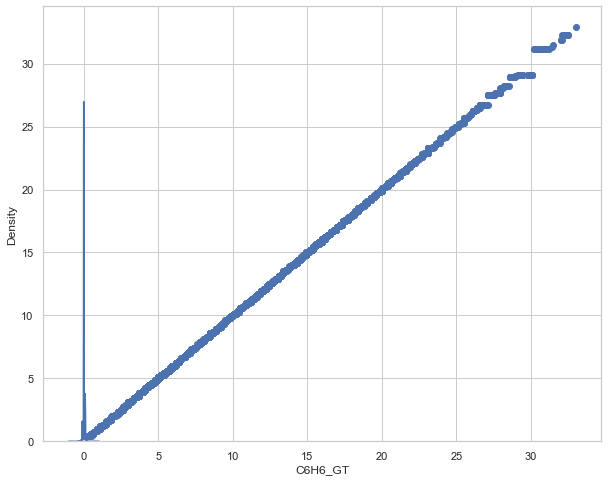

In [205]:
sns.distplot(y_test-dt_predict);
plt.scatter(y_test,dt_predict);

In [206]:
dtstat = [round(metrics.mean_squared_error(y_test,dt_predict),4), round(np.sqrt(metrics.mean_squared_error(y_test,dt_predict)),4),round(metrics.r2_score(y_test,dt_predict)*100,4)]
print('MSE value for Decision Tree Regression model is {}'.format(dtstat[0]))
print('RMSE value for Decision Tree Regression model is {}'.format(dtstat[1]))
print('R^2 value for Decision Tree Regression model is {}'.format(dtstat[2]))

MSE value for Decision Tree Regression model is 0.0042
RMSE value for Decision Tree Regression model is 0.0649
R^2 value for Decision Tree Regression model is 99.9895


In [207]:
conclusion = pd.DataFrame(data=[lmstat,lassostat,dtstat],
                          index=['Linear Regression','Lasso Regression','Decision Tree Regression'],
                         columns = ['MSE','RMSE','R^2'])

In [208]:
conclusion

,MSE,RMSE,R^2
Linear Regression,1.1097,1.0534,97.2476
Lasso Regression,1.0903,1.0442,97.2955
Decision Tree Regression,0.0042,0.0649,99.9895


## Conclusion:<a name="conclusion"></a>

For designing the model for predicting Quality of Air, I have applied Linear Regression, Decision Tree, Lasso Regression. 

When tested on test data below are MSE, RMSE and R^2 scores obtained from different algorithms:

In [209]:
conclusion

,MSE,RMSE,R^2
Linear Regression,1.1097,1.0534,97.2476
Lasso Regression,1.0903,1.0442,97.2955
Decision Tree Regression,0.0042,0.0649,99.9895


**Result:** <u>By seeing the table we conclude that Decision Tree Regression model is giving More accuracy out of all these model so it will be considered as the best model for evaluating the Quality of Air.</u>

### Modeling & Research answers :

> Q: Find the classification model that can be used in the future as a predictive model, that will result in higher accuracy?

In comparison with all 3 classification algorithms Decision Tree Regression outperformed Linear Regression and Lasso Regression classification by achieving the highest accuracy among all of the three classification algorithms.
So Decision Tree Regression model will be considered as the best predictive model for evaluating the Quality of Air.

> Q: Find the variable highly correlated with the target variable. Decide independent parameter to predict the dependent parameter for modelling ?

By seeing the correlation we conclude that Target variable : C6H6_GT is highly correlated to PTO8.S2_NMHC, so we take PTO8.S2_NMHC as independent parameter to predict the dependent parameter i.e., C6H6_GT
